In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [20]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
print(len(x_train))
print(len(x_test))

60000
10000


0


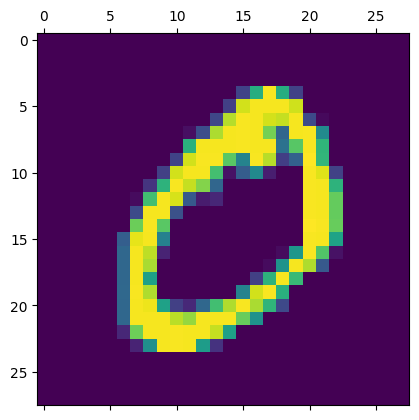

In [22]:
plt.matshow(x_train[1])
print(y_train[1])

Scaling is necessary to bring all the values in the same range of 0 to 1

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
x_train.shape

(60000, 28, 28)

Each image is 28*28 and we need to reshape because we will form a vertical one dimension matrix and then input it to the neural network.
```
0 o
1 o
2 o
.
.
.
784 o

```

Thus we convert 2D array into 1D array


In [25]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [26]:
x_train_flattened.shape

(60000, 784)

if you don't want to use keras.layers.Flatten(input_shape=(28, 28)) then in model.fit(x_train, y_train, epochs=5) use model.fit(x_train_flattened, y_train, epochs=5)

Thumb rule for number of neurons in the hidden layer is
1. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
2. The number of hidden neurons should be less than twice the size of the input layer.

So here 2*784/3+10 = 532

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(532, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#first number represents the number of neuron in a particular layer
#you need to give input shape only in the first layer afterwards it figures out on its own

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9030 - loss: 0.3351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9759 - loss: 0.0793
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9844 - loss: 0.0503
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9894 - loss: 0.0330
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9920 - loss: 0.0250


In [40]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9751 - loss: 0.0851


[0.07046878337860107, 0.9789000153541565]

One example from test dataset

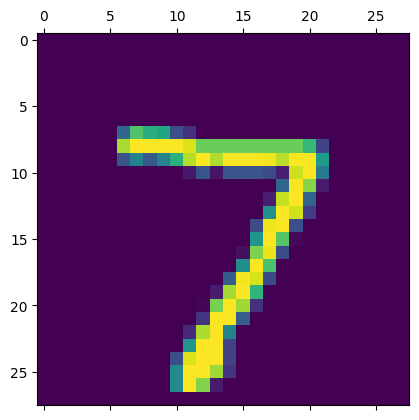

In [41]:
plt.matshow(x_test[0])

In [42]:
y_prediction = model.predict(x_test)
y_prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([4.4107619e-03, 1.9516952e-04, 6.6035531e-02, 8.8191563e-01,
       3.7598349e-07, 3.0184950e-04, 3.7378612e-08, 9.9999988e-01,
       4.9623667e-04, 1.0742505e-02], dtype=float32)

In [31]:
np.argmax(y_prediction[0])

7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_prediction]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    0,    1,    0,    1,    2,    0,    2],
       [   0, 1129,    1,    1,    0,    0,    2,    0,    2,    0],
       [   5,    1, 1002,    1,    2,    0,    0,   17,    4,    0],
       [   2,    1,    1,  997,    1,    0,    0,    6,    2,    0],
       [   0,    0,    3,    0,  967,    0,    2,    3,    1,    6],
       [   4,    0,    0,   15,    1,  864,    3,    2,    3,    0],
       [   3,    2,    0,    1,    6,    2,  943,    0,    1,    0],
       [   1,    2,    4,    0,    1,    0,    0, 1018,    1,    1],
       [  10,    0,    5,    2,    4,    3,    1,    7,  940,    2],
       [   3,    4,    0,    7,   10,    5,    0,   23,    1,  956]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

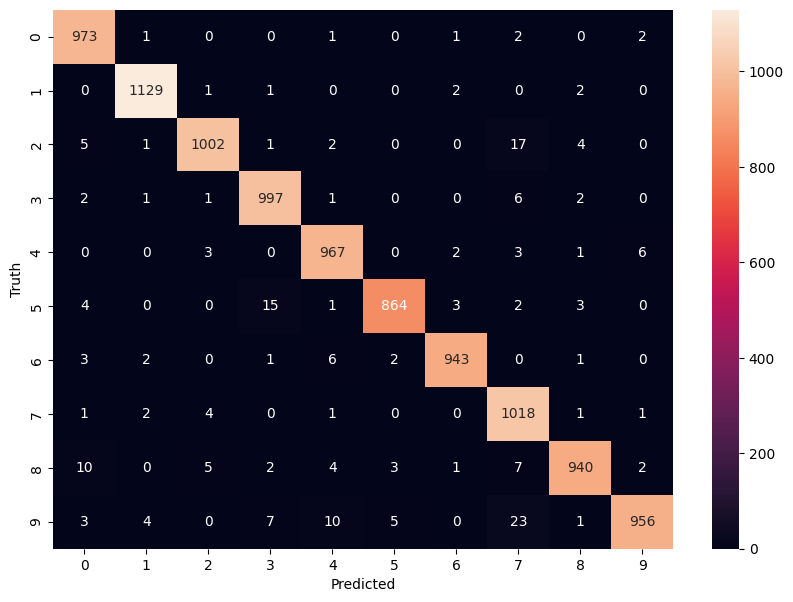

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

suppose we take [2,0] then the value is 5 and so that means the orignal value was supposed to be 2 but 5 times it predicted 0